https://signate.jp/competitions/141

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## 観光宿泊者学習データ
全8国立公園（阿寒摩周国立公園、十和田八幡平国立公園、日光国立公園、伊勢志摩国立公園、
大山隠岐国立公園、阿蘇くじゅう国立公園、霧島錦江湾国立公園、慶良間諸島国立公園）の2015/01/01～2016/12/31までの観光宿泊者数データ。

In [28]:
df_train = pd.read_csv('../data/raw/train.tsv',sep='\t')
print('-- 行・列数 --')
print(df_train.shape)
print('------------')
print('-- カラム --')
print(df_train.columns)
print('------------')
print('-- データの概要 --')
print(df_train.info())
print('------------')
print('-- 欠損値の数 --')
print(df_train.isnull().sum())
print('------------')
print('-- 要約統計量 --')
print(df_train.describe())
print('------------')

-- 行・列数 --
(5848, 3)
------------
-- カラム --
Index(['datetime', 'park', 'visitors'], dtype='object')
------------
-- データの概要 --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5848 entries, 0 to 5847
Data columns (total 3 columns):
datetime    5848 non-null object
park        5848 non-null object
visitors    5848 non-null int64
dtypes: int64(1), object(2)
memory usage: 137.1+ KB
None
------------
-- 欠損値の数 --
datetime    0
park        0
visitors    0
dtype: int64
------------
-- 要約統計量 --
           visitors
count   5848.000000
mean    7186.736149
std     8791.087517
min        0.000000
25%      346.000000
50%     4214.500000
75%    11103.750000
max    87008.000000
------------


In [29]:
df_train.head(16)

,datetime,park,visitors
0,2015-01-01,阿寒摩周国立公園,11028
1,2015-01-01,十和田八幡平国立公園,34757
2,2015-01-01,日光国立公園,29714
3,2015-01-01,伊勢志摩国立公園,42652
4,2015-01-01,大山隠岐国立公園,3637
5,2015-01-01,阿蘇くじゅう国立公園,1369
6,2015-01-01,霧島錦江湾国立公園,35352
7,2015-01-01,慶良間諸島国立公園,151
8,2015-01-02,阿寒摩周国立公園,11153
9,2015-01-02,十和田八幡平国立公園,33795


In [42]:
df_akan = df_train[df_train['park'].isin(['阿寒摩周国立公園'])]
df_akan_2015 = df_akan[0:365]
df_akan_2016 = df_akan[365:731]


,datetime,park,visitors
2920,2016-01-01,阿寒摩周国立公園,14035
2928,2016-01-02,阿寒摩周国立公園,10463
2936,2016-01-03,阿寒摩周国立公園,9955
2944,2016-01-04,阿寒摩周国立公園,6089
2952,2016-01-05,阿寒摩周国立公園,3213
2960,2016-01-06,阿寒摩周国立公園,2527
2968,2016-01-07,阿寒摩周国立公園,2777
2976,2016-01-08,阿寒摩周国立公園,3797
2984,2016-01-09,阿寒摩周国立公園,4731
2992,2016-01-10,阿寒摩周国立公園,5836


col_wrap： how many graphs in a columns
size： size of graph

# 阿寒摩周国立公園の観光客推移

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


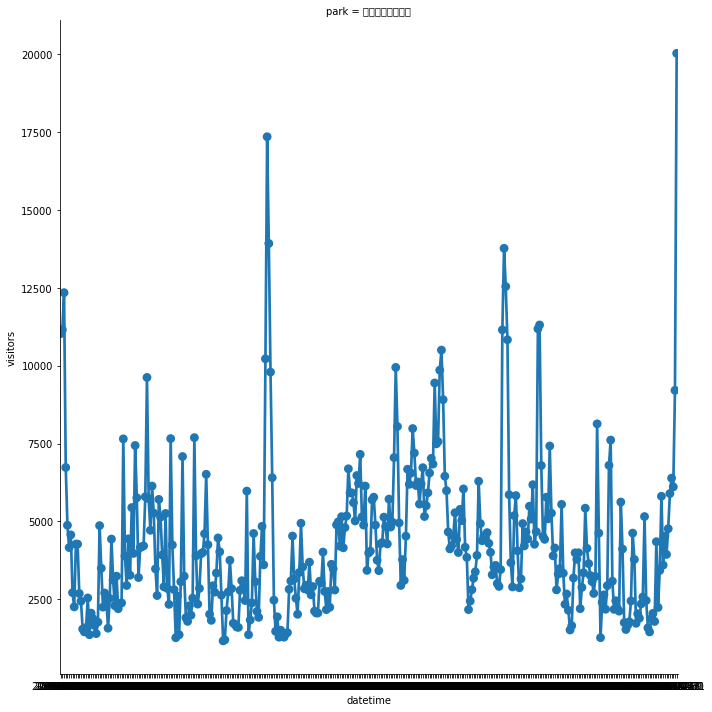

In [49]:
import  seaborn  as  sns
df_akan = df_train[df_train['park'].isin(['阿寒摩周国立公園'])]
df_akan_2015 = df_akan[0:365]
grid = sns.FacetGrid(df_akan_2015, col="park", hue="park", col_wrap=1, size=10)
grid.map(sns.pointplot, 'datetime', 'visitors')

In [45]:
df_akan_2016 = df_akan[365:731]
grid = sns.FacetGrid(df_akan_2016, col="park", hue="park", col_wrap=3, size=50)
grid.map(sns.pointplot, 'datetime', 'visitors')

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


伊勢志摩国立公園、日光国立公園、霧島錦江湾国立公園の訪問者数が多い

In [5]:
# Feature engineering from datetime
# https://adtech.cyberagent.io/techblog/archives/259
# https://note.nkmk.me/python-pandas-datetime-timestamp/
df_train['datetime'] = pd.to_datetime(df_train['datetime']) # dtypeをdatetime64に変換
df_train['year'] = df_train['datetime'].dt.year
df_train['month'] = df_train['datetime'].dt.month
df_train['day'] = df_train['datetime'].dt.day
df_train['dayofweek'] = df_train['datetime'].dt.dayofweek
df_train.head()

,datetime,park,visitors,year,month,day,dayofweek
0,2015-01-01,阿寒摩周国立公園,11028,2015,1,1,3
1,2015-01-01,十和田八幡平国立公園,34757,2015,1,1,3
2,2015-01-01,日光国立公園,29714,2015,1,1,3
3,2015-01-01,伊勢志摩国立公園,42652,2015,1,1,3
4,2015-01-01,大山隠岐国立公園,3637,2015,1,1,3


In [6]:
## categorize park column
labels, uniques = pd.factorize(df_train['park'])
df_train['park'] = labels
df_train.head(16)

,datetime,park,visitors,year,month,day,dayofweek
0,2015-01-01,0,11028,2015,1,1,3
1,2015-01-01,1,34757,2015,1,1,3
2,2015-01-01,2,29714,2015,1,1,3
3,2015-01-01,3,42652,2015,1,1,3
4,2015-01-01,4,3637,2015,1,1,3
5,2015-01-01,5,1369,2015,1,1,3
6,2015-01-01,6,35352,2015,1,1,3
7,2015-01-01,7,151,2015,1,1,3
8,2015-01-02,0,11153,2015,1,2,4
9,2015-01-02,1,33795,2015,1,2,4


In [7]:
df_train['park'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [8]:
# label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_train['park'])
le.transform(['阿寒摩周国立公園', '十和田八幡平国立公園', '日光国立公園', '伊勢志摩国立公園','大山隠岐国立公園','阿蘇くじゅう国立公園', '霧島錦江湾国立公園', '慶良間諸島国立公園']) 

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:462: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


ValueError: y contains new labels: ['伊勢志摩国立公園' '十和田八幡平国立公園' '大山隠岐国立公園' '慶良間諸島国立公園' '日光国立公園' '阿寒摩周国立公園'
 '阿蘇くじゅう国立公園' '霧島錦江湾国立公園']

In [ ]:
# onehot vector for park column
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
park_onehot = encoder.fit_transform(df_train['park'])
park_onehot
df_park = pd.DataFrame(park_onehot,columns=le.classes_)
df_train = pd.concat([df_train,df_park],axis=1)
df_train

In [ ]:
# visitor数降順
df_train.sort_values('visitors',ascending=False)

日付ごとの平均 visitor数は、GWと年末年始が多い
単純に休日フラグをつけたデータが欲しいかも

In [ ]:
# 日付ごとの平均 visitor数
df_train.groupby('datetime').mean().sort_values('visitors',ascending=False)

## 予測対象データ（test.tsv）
全8国立公園（阿寒摩周国立公園、十和田八幡平国立公園、日光国立公園、伊勢志摩国立公園、大山隠岐国立公園、阿蘇くじゅう国立公園、霧島錦江湾国立公園、慶良間諸島国立公園）の2017/01/01～2017/12/31までの予測対象データ。  
予測対象なのでtrainデータと異なり、visitorsカラムが無い。
  
※indexは予測結果投稿時に必要となります。応募用サンプルファイルの説明もご参照ください。

In [ ]:
df_test = pd.read_csv('../data/raw/test.tsv',sep='\t')
df_test['datetime'] = pd.to_datetime(df_test['datetime']) # dtypeをdatetime64に変換
df_test['year'] = df_test['datetime'].dt.year
df_test['month'] = df_test['datetime'].dt.month
df_test['day'] = df_test['datetime'].dt.day
df_test['dayofweek'] = df_test['datetime'].dt.dayofweek

#labels, uniques = pd.factorize(df_test['park'])
#df_test['park'] = labels

# onehot vector for park column
encoder = LabelBinarizer()
park_onehot_test = encoder.fit_transform(df_test['park'])
df_park_test = pd.DataFrame(park_onehot_test,columns=le.classes_)
df_test = pd.concat([df_test,df_park_test],axis=1)
df_test.head(16)

## SNSデータ（hotlink.tsv）
観光及び国立公園に関連する語句が含まれる投稿の2015/01/01～2017/12/30までの日別件数（ブログ・twitter・掲示板）データ。

In [ ]:
df_hotlink = pd.read_csv('../data/raw/hotlink.tsv',sep='\t')
print(df_hotlink.shape)
df_hotlink.head(10)

## ロケーション付SNSデータ（nightley.tsv）
日光国立公園区画内のSNSロケーション解析データ投稿数データ。  
※１ 本データは日光国立公園区画内のみ含まれています。  
※２ データ期間は2016/01/01～2017/12/30までです。

日本人と外国人のカウント数がある。

In [66]:
df_nightley = pd.read_csv('../data/raw/nightley.tsv',sep='\t')
df_nightley.head()

,datetime,Japan_count,Foreign_count
0,2016-01-01,28,0
1,2016-01-02,66,1
2,2016-01-03,75,6
3,2016-01-04,50,1
4,2016-01-05,25,0


In [65]:
# 前日分のカウントに変換
df_nightley['Japan_count'] = df_nightley['Japan_count'].shift(-1)
df_nightley['Foreign_count'] = df_nightley['Foreign_count'].shift(-1)
df_nightley



,datetime,Japan_count,Foreign_count
0,2016-01-01,75.0,1.0
1,2016-01-02,50.0,6.0
2,2016-01-03,25.0,1.0
3,2016-01-04,29.0,0.0
4,2016-01-05,7.0,2.0
5,2016-01-06,9.0,1.0
6,2016-01-07,43.0,1.0
7,2016-01-08,68.0,2.0
8,2016-01-09,37.0,2.0
9,2016-01-10,19.0,2.0


## メッシュ型流動人口データ（agoop.zip）
各国立公園付近エリア単位の「平均人口」の集計値データ。zipファイル内には100mメッシュ集計データ、100mメッシュIDデータ、都道府県・市区町村マスタの3種類のデータが同封されています。

100mメッシュ集計データ（month_time_mesh100m_YYYYMM.tsv, 201501～201711までの全35ファイル）
※流動人口数が1人未満の場合はデータが出力されていませんのでご注意ください。

In [10]:
df_pop_city_2015 = pd.read_csv('../data/raw/agoop/city_2017.tsv',sep='\t')
df_pop_city_2015.head()

,prefcode,prefecture,citycode,cwtv,address
0,1,北海道,1000,NaN,北海道
1,1,北海道,1100,札幌市,北海道札幌市
2,1,北海道,1101,札幌市中央区,北海道札幌市中央区
3,1,北海道,1102,札幌市北区,北海道札幌市北区
4,1,北海道,1103,札幌市東区,北海道札幌市東区


In [11]:
df_pop_mesh100m_2015 = pd.read_csv('../data/raw/agoop/mesh100m_2015.tsv',sep='\t')
df_pop_mesh100m_2015.head()

,mesh100mid,loncenter,latcenter,lonmax,latmax,lonmin,latmin,prefcode,citycode
0,39271198141,127.226875,26.162083,127.22750,26.162500,127.22625,26.161667,47,47354
1,39271198203,127.235625,26.158750,127.23625,26.159167,127.23500,26.158333,47,47354
2,39271198210,127.231875,26.159583,127.23250,26.160000,127.23125,26.159167,47,47354
3,39271198212,127.234375,26.159583,127.23500,26.160000,127.23375,26.159167,47,47354
4,39271198214,127.236875,26.159583,127.23750,26.160000,127.23625,26.159167,47,47354


In [ ]:
df_pop_month_time_mesh100m_201502 = pd.read_csv('../data/raw/agoop/month_time_mesh100m_201502.tsv',sep='\t')
df_pop_month_time_mesh100m_201502.head()

## 国別月別来訪者数集計データ
十和田八幡平、日光、阿寒摩周、伊勢志摩国立公園周辺の国籍別・月単位での来訪者数集計データ。  
※１ 本データには上記４つの国立公園周辺のデータのみ含まれています。  
※２ データ期間は2016年1月～2017年11月までとなります。  
※３ countが1以上10未満の値の場合は「1-9」という値となっています。

★どこの国の来訪者が多いか調べて、日本人の来訪者数と比較する  
多いところを予測するのが良さそう  
中国の大型連休などに合わせて来訪者が増えそう

In [ ]:
df_colopl = pd.read_csv('../data/raw/colopl.tsv',sep='\t')
# countが1-9の場合、0を入れる。それ以外はそのまま。 ここ本当は9ではなく何を代入すればいいか考える
df_colopl['count'] = [0 if i=='1-9' else i for i in df_colopl['count']] 
df_colopl['count'] = df_colopl['count'].astype('int64')
print(df_colopl.shape)
print(df_colopl.describe())
print(df_colopl.info())
df_colopl.head(30)

In [12]:
# 国ごとの来訪者数平均を多い順に
df_colopl.groupby('country_jp').mean().sort_values('count', ascending=False)['count']

NameError: name 'df_colopl' is not defined

# 気象庁データ（weather.tsv）
国立公園周辺12地点の気象観測データ。

In [ ]:
df_weather = pd.read_csv('../data/raw/weather.tsv',sep='\t')
df_weather.tail(100)

## 積雪気象観測データ（nied_oyama.tsv）
防災科学技術研究所 ⼤⼭鏡ヶ成積雪気象観測施設における積雪気象観測データ。  
緯度経度35°20′21″ 133°34′51″  
標高：875m  

In [ ]:
df_nied_oyama = pd.read_csv('../data/raw/nied_oyama.tsv',sep='\t')
df_nied_oyama.head()

## 路線検索データ（jorudan.zip）
ジョルダンの路線検索ログデータ。

In [ ]:
df_train = pd.read_csv('../data/raw/jorudan.tsv',sep='\t')
print(df_train.shape)
print(df_train.columns)
df_train.head()

## 応募用サンプルファイル（sample_submit.tsv）
1列目の値はtest.tsvの"index"に対応した値であり、2列目が"index"に対応する予測値となります。ヘッダ無しtsv形式で投稿ください。

In [ ]:
df_sample_submit = pd.read_csv('../data/raw/sample_submit.tsv',sep='\t')
df_sample_submit.head()

In [ ]:
df_holiday = pd.read_csv('../data/raw/holiday.csv')
df_holiday['datetime'] = pd.to_datetime(df_holiday['datetime'])
df_holiday.columns

In [ ]:
# 学習データと休日データの結合
df_merged = pd.merge(df_train,df_holiday,on='datetime')
df_merged

In [ ]:
import pandas as pd
from sklearn.cross_validation import train_test_split
import math
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

In [ ]:
df_except_y = df_merged.drop(['park','visitors','datetime'], axis=1)
X_train = df_except_y.as_matrix() 
y_train = df_merged['visitors'].as_matrix() # 目的変数に "y" を利用
df_except_y.head()

In [ ]:
df_test_merged = pd.merge(df_test,df_holiday,on='datetime')
df_test_merged = df_test_merged.drop(['park','datetime','index'], axis=1)
X_test = df_test_merged.as_matrix()
df_test_merged.head()

In [ ]:
params = {"learning_rate":[0.1,0.3,0.5],
        "max_depth": [2,3,5,10],
         "subsample":[0.5,0.8,0.9,1],
         "colsample_bytree": [0.5,1.0],
         }

# モデルにインスタンス生成
model = xgb.XGBRegressor()
cv = GridSearchCV(model,params,cv=10,n_jobs=-1)

In [ ]:
# 予測モデルを作成
cv.fit(X_train, y_train)

In [ ]:
# predict
y_train_pred = cv.predict(X_train)
y_test_pred = cv.predict(X_test)

In [ ]:
submit = pd.DataFrame({
    '':df_test['index'],
    '':y_test_pred})
submit.to_csv('../submit/submit_3.tsv',sep='\t')

In [ ]:
submit = pd.DataFrame({
    '':df_train,
    '':y_train_pred})
submit.to_csv('../submit/validation.csv')

In [ ]:
df = pd.read_csv('../submit/submit_2.csv',index_col=0)
df.head()

In [ ]:
df.to_csv('../submit/submit_2.tsv',sep='\t')